In [177]:
import pandas as pd
from joblib import load
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [178]:
caminho = '../../../../util/data/'

In [179]:
df_categorias = load(caminho + 'df_categorias.z')
df_clientes = load(caminho + 'df_clientes.z')
df_produtos = load(caminho + 'df_produtos.z')
df_vendas = load(caminho + 'df_vendas.z')
df_unidades = load(caminho + 'df_unidades.z')
df_vendedores = load(caminho + 'df_vendedores.z')


<h1>Análise do DataFrame <strong>df_produtos:</h1>

In [180]:
df_produtos.head()

,codigo,descricao,codigo_barras,unidade,marca,codigo_categoria,categoria,classificacao,preco_venda,preco_venda_minmax,preco_venda_std
0,194408,CANETA REF 35629,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,0.00,0.000000,-0.222407
1,194412,CANETA REF 35633,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,8.93,0.000174,-0.215874
2,194413,CANETA REF 35634,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,0.00,0.000000,-0.222407
3,006467,CANETA REF 5968,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,8.38,0.000163,-0.216276
4,004559,CANETA REF 4092,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,67.91,0.001324,-0.172726


In [181]:
categoria_totais = df_produtos.groupby('categoria')['preco_venda'].sum().sort_values(ascending=False)
print(categoria_totais)

categoria
ACESSORIO                 767736.51
PASTA                     501586.54
TINTA                     391596.30
LIVRO                     293033.89
BEBIDA                    229958.05
MATERIAL DE LIMPEZA       152077.10
DRONE                     113341.52
CANETA                     53790.06
SOM AUTOMOTIVO             53464.16
MIDIA DE ARMAZENAMENTO     51149.70
MATERIAL DE EMBALAGEM      46874.32
MOVEIS                     39783.00
SOFAS                      35690.00
ENVELOPE                   33552.93
COMPUTADOR                 32472.33
CAIXA DE SOM               31024.72
GPS                        27262.38
PRESENTE                   26386.20
TELEVISAO                  24722.53
ALIMENTO                    5953.20
CABO                        4551.38
PARAFUSO                       0.00
Name: preco_venda, dtype: float64


In [182]:
#plotando gráfico do total em estoque por categoria
fig1 = go.Figure()
for idx, (categoria, total) in enumerate(categoria_totais.items()):
    fig1.add_trace(go.Bar(
        x=[categoria],
        y=[total],
        name=str(categoria),
        text=[total],
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel[idx % len(px.colors.qualitative.Pastel)])
    ))
fig1.update_layout(
    title='Total em valor em Estoque por Categoria',
    xaxis_title='Categoria',
    yaxis_title='Total de Vendas',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=list(range(len(categoria_totais.index))),
        ticktext=categoria_totais.index,
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
    showlegend=True,
    legend_title_text='Categoria'
)
fig1.show()

<h3>O gráfico acima representa a quantidade em valor monetário em estoque por cada categoria existente.</h3>

In [183]:
quantidade_por_categoria = df_produtos['categoria'].value_counts().sort_values(ascending=False)

#plotando gráfico de barras de quantidade de produtos por categoria
fig2 = go.Figure(data=[
    go.Bar(
        x=quantidade_por_categoria.index,
        y=quantidade_por_categoria.values,
        text=quantidade_por_categoria.values,
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel)
    )
])
fig2.update_layout(
    title='Quantidade de Produtos por Categoria',
    xaxis_title='Categoria',
    yaxis_title='Quantidade de Produtos',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=list(range(len(quantidade_por_categoria.index))),
        ticktext=quantidade_por_categoria.index,
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
)
fig2.show()

<h3>O gráfico acima representa a quantidade em estoque para cada categoria do protudo.</h3>

In [184]:
quantidade_por_marca = df_produtos['marca'].value_counts().sort_values(ascending=False)

#plotando gráfico de barras para quantidade de produtos por marca
fig3 = go.Figure()
for marca_nome, quantidade in quantidade_por_marca.items():
    fig3.add_trace(go.Bar(
        x=[marca_nome],
        y=[quantidade],
        name=marca_nome,
        text=[quantidade],
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel[quantidade_por_marca.index.get_loc(marca_nome) % len(px.colors.qualitative.Pastel)])
    ))
fig3.update_layout(
    title='Quantidade de Produtos por Marca',
    xaxis_title='Marca',
    yaxis_title='Quantidade de Produtos',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
    legend_title_text='Marca'
)
fig3.show()


<h3>Já o gráfico acima representa a quantidade em estoque para cada marca.</h3>

In [185]:
df_produtos.groupby('marca')['preco_venda'].sum().sort_values(ascending=False)
#plotando gráfico de barras do total em estoque por marca
fig4 = go.Figure()
for idx, (marca, total) in enumerate(df_produtos.groupby('marca')['preco_venda'].sum().sort_values(ascending=False).items()):
    fig4.add_trace(go.Bar(
        x=[marca],
        y=[total],
        name=str(marca),
        text=[total],
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel[idx % len(px.colors.qualitative.Pastel)])
    ))
fig4.update_layout(
    title='Total em valor em Estoque por Marca',
    xaxis_title='Marca',
    yaxis_title='Total de Vendas',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=list(range(len(df_produtos['marca'].unique()))),
        ticktext=df_produtos['marca'].unique(),
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
    showlegend=True,
    legend_title_text='Marca'
)
fig4.show()

<h3>Por fim, temos o valor, segundo seu preço, por marca.</h3>

<h1>Análise do DataFrame <strong>df_clientes:</h1>

In [186]:
df_clientes.head()

,codigo,id_fiscal,nome,nome_fantasia,natureza_juridica,id_fiscal_2,id_fiscal_3,contribuinte_icms,vendedor,cst
0,9712,322.175.103-63,JOAO MIRANDA DA SILVA,JOAO MIRANDA DA SILVA,PF,0,ISENTO,N,9,PD
1,239,17.014.825/0001-68,VERDUREIRA E SORVETERIA PALHANO LTDA,VERDUREIRA E SORVETERIA PALHANO LTDA,LT,82500016,ISENTO,S,9,PD
2,8810,17.055.887/0003-80,M & C LANCHES LTDA,M & C LANCHES LTDA,LT,88700038,ISENTO,S,58,PD
3,6006,17.041.611/0001-80,BAR E LANCHONETE FUNCHAL LTDA,BAR E LANCHONETE FUNCHAL LTDA,LT,61100018,ISENTO,S,79,PD
4,7761,17.050.253/0001-72,LANCHERIA LTDA,LANCHERIA LTDA,LT,25300017,ISENTO,S,11,PD


In [187]:
nomes_mais_frequentes = df_clientes['nome'].value_counts().sort_values(ascending=False).head(10)

#plotando gráfico de barras dos top 10 clientes mais frequentes
fig5 = go.Figure(data=[
    go.Bar(
        x=nomes_mais_frequentes.index,
        y=nomes_mais_frequentes.values,
        text=nomes_mais_frequentes.values,
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel)
    )
])
fig5.update_layout(
    title='Top 10 Clientes Mais Frequentes',
    xaxis_title='Cliente',
    yaxis_title='Frequência',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=list(range(len(nomes_mais_frequentes.index))),
        ticktext=nomes_mais_frequentes.index,
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
)
fig5.show()




<h3>Na categoria clientes, podemos observar o ranking dos 10 clientes mais frequentes.</h3>

In [188]:
vendedores = df_clientes['vendedor'].value_counts().sort_values(ascending=False)

#FIltrando vendedores de acordo com seu código
vendedores = vendedores[vendedores.index.isin(df_vendedores['codigo'])]
df_vendedores = df_vendedores[['codigo', 'nome_completo']]

vendedor_nomes = df_vendedores.set_index('codigo')['nome_completo']
vendedores_legenda = vendedores.index.map(lambda x: vendedor_nomes.get(x, str(x)))

#plotando gráfico de barras
fig6 = go.Figure(data=[
    go.Bar(
        x=vendedores_legenda,
        y=vendedores.values,
        text=vendedores.values,
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel)
    )
])
fig6.update_layout(
    title='Frequência de Clientes por Vendedor',
    xaxis_title='Vendedor',
    yaxis_title='Quantidade de Clientes',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=list(range(len(vendedores_legenda))),
        ticktext=vendedores_legenda,
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
)
fig6.show()


<h3>Acima observamos a frequência com que cada vendedor possui em atendimentos ao cliente. Portanto, nos leva a refletir a eficácia com que cada um possui em atendimentos.</h3>

<h1>Análise do DataFrame <strong>df_vendas:</h1>

In [189]:
df_vendas.head()

,codigo_empresa,centro_resultado,documento,codigo_cliente,codigo_empregado,data_emissao,hora_emissao,data_fechamento,hora_fechamento,data_faturamento,...,total_minmax,total_zscore,custo_medio,custo_medio_minmax,custo_medio_zscore,valor_desconto,valor_desconto_minmax,valor_desconto_zscore,pedido_DV,pedido_PV
0,2,2,24560,4395,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.143171,-0.277110,5.2870,0.137336,-0.232757,20.64,0.003922,-0.208284,False,True
1,1,2,22433,236,9,2023-02-13,10:40:44,2023-04-27,07:18:40,2023-04-27,...,0.143806,-0.255692,5.2931,0.137337,-0.232726,0.00,0.000000,-0.299543,False,True
2,2,2,24560,4395,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.143806,-0.255692,15.3550,0.139020,-0.181135,16.80,0.003193,-0.225262,False,True
3,2,2,24560,4395,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.147791,-0.121346,31.3017,0.141687,-0.099371,54.72,0.010399,-0.057599,False,True
4,2,2,24560,4395,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.142940,-0.284898,15.3650,0.139022,-0.181084,11.84,0.002250,-0.247193,False,True


In [190]:
codigo_cliente_nome_cliente = df_vendas['codigo_cliente'].map(df_clientes.set_index('codigo')['nome'])
nome_cliente = df_vendas['codigo_cliente'].map(df_clientes.set_index('codigo')['nome'])

In [191]:
copy_vendas = df_vendas

In [192]:
copy_vendas['codigo_cliente'] = codigo_cliente_nome_cliente

In [193]:
copy_vendas.head()

,codigo_empresa,centro_resultado,documento,codigo_cliente,codigo_empregado,data_emissao,hora_emissao,data_fechamento,hora_fechamento,data_faturamento,...,total_minmax,total_zscore,custo_medio,custo_medio_minmax,custo_medio_zscore,valor_desconto,valor_desconto_minmax,valor_desconto_zscore,pedido_DV,pedido_PV
0,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.143171,-0.277110,5.2870,0.137336,-0.232757,20.64,0.003922,-0.208284,False,True
1,1,2,22433,QUALITY PROJETOS SERVICOS ADMINISTRATIVOS LTDA,9,2023-02-13,10:40:44,2023-04-27,07:18:40,2023-04-27,...,0.143806,-0.255692,5.2931,0.137337,-0.232726,0.00,0.000000,-0.299543,False,True
2,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.143806,-0.255692,15.3550,0.139020,-0.181135,16.80,0.003193,-0.225262,False,True
3,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.147791,-0.121346,31.3017,0.141687,-0.099371,54.72,0.010399,-0.057599,False,True
4,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.142940,-0.284898,15.3650,0.139022,-0.181084,11.84,0.002250,-0.247193,False,True


In [194]:
copy_vendas["data_faturamento"] = pd.to_datetime(copy_vendas["data_faturamento"], errors="coerce")

In [195]:
freq_clientes = copy_vendas.groupby(["data_faturamento", "codigo_cliente"]).size().reset_index(name="compras")


In [196]:
copy_vendas['codigo_cliente'].groupby(copy_vendas['codigo_cliente']).count().sort_values(ascending=False).head(10)
#plotando gráfico de barras dos 10 clientes que mais compraram
top_10_clientes = copy_vendas['codigo_cliente'].value_counts().head(10)
fig7 = go.Figure(data=[
    go.Bar(
        x=top_10_clientes.index,
        y=top_10_clientes.values,
        text=top_10_clientes.values,
        textposition='auto',
        marker=dict(color=px.colors.qualitative.Pastel)
    )
])
fig7.update_layout(
    title='Top 10 Clientes Mais Recorrentes',
    xaxis_title='Cliente',
    yaxis_title='Frequência',
    template='plotly_white',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=list(range(len(top_10_clientes.index))),
        ticktext=top_10_clientes.index,
        showgrid=True,
        gridcolor='LightGray',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray',
        zerolinewidth=2
    ),
)
fig7.show()

<h3>Acima, estão elencados os top 10 clientes mais recorrentes, baseados na frequência com que cada cliente solicita a empresa e sua data de faturamento.</h3>

In [197]:
fig8 = px.scatter(
    freq_clientes,
    x="data_faturamento",
    y="compras",
    color="codigo_cliente",
    title="Frequência de Compras por Cliente ao Longo do Tempo",
    labels={"data_faturamento": "Data de Faturamento", "compras": "Quantidade de Compras"},
    template="plotly_white"
)

fig8.update_layout(
    xaxis_title="Data de Faturamento",
    yaxis_title="Quantidade de Compras",
    xaxis=dict(tickangle=-45, showgrid=True, gridcolor="LightGray"),
    yaxis=dict(showgrid=True, gridcolor="LightGray", zeroline=True, zerolinecolor="LightGray", zerolinewidth=2),
    legend_title_text="Cliente"
)
fig8.show()


<h3>Podemos observar um hiáto de tempo com relação a data de faturamento 

In [198]:
fig9 = px.line(
    freq_clientes,
    x="data_faturamento",
    y="compras",
    color="codigo_cliente",
    title="Frequência de Compras por Cliente ao Longo do Tempo",
    labels={"data_faturamento": "Data de Faturamento", "compras": "Quantidade de Compras"},
    template="plotly_white"
)

fig9.update_layout(
    xaxis_title="Data de Faturamento",
    yaxis_title="Quantidade de Compras",
    xaxis=dict(tickangle=-45, showgrid=True, gridcolor="LightGray"),
    yaxis=dict(showgrid=True, gridcolor="LightGray"),
    legend_title_text="Cliente"
)
fig9.show()


In [199]:
df_vendas.head()

,codigo_empresa,centro_resultado,documento,codigo_cliente,codigo_empregado,data_emissao,hora_emissao,data_fechamento,hora_fechamento,data_faturamento,...,total_minmax,total_zscore,custo_medio,custo_medio_minmax,custo_medio_zscore,valor_desconto,valor_desconto_minmax,valor_desconto_zscore,pedido_DV,pedido_PV
0,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.143171,-0.277110,5.2870,0.137336,-0.232757,20.64,0.003922,-0.208284,False,True
1,1,2,22433,QUALITY PROJETOS SERVICOS ADMINISTRATIVOS LTDA,9,2023-02-13,10:40:44,2023-04-27,07:18:40,2023-04-27,...,0.143806,-0.255692,5.2931,0.137337,-0.232726,0.00,0.000000,-0.299543,False,True
2,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.143806,-0.255692,15.3550,0.139020,-0.181135,16.80,0.003193,-0.225262,False,True
3,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.147791,-0.121346,31.3017,0.141687,-0.099371,54.72,0.010399,-0.057599,False,True
4,2,2,24560,PAEZE POSTO DE LAVACAO LTDA,56,2023-03-21,12:10:07,2023-03-21,12:12:40,2023-03-21,...,0.142940,-0.284898,15.3650,0.139022,-0.181084,11.84,0.002250,-0.247193,False,True


In [200]:
df_clientes.head()

,codigo,id_fiscal,nome,nome_fantasia,natureza_juridica,id_fiscal_2,id_fiscal_3,contribuinte_icms,vendedor,cst
0,9712,322.175.103-63,JOAO MIRANDA DA SILVA,JOAO MIRANDA DA SILVA,PF,0,ISENTO,N,9,PD
1,239,17.014.825/0001-68,VERDUREIRA E SORVETERIA PALHANO LTDA,VERDUREIRA E SORVETERIA PALHANO LTDA,LT,82500016,ISENTO,S,9,PD
2,8810,17.055.887/0003-80,M & C LANCHES LTDA,M & C LANCHES LTDA,LT,88700038,ISENTO,S,58,PD
3,6006,17.041.611/0001-80,BAR E LANCHONETE FUNCHAL LTDA,BAR E LANCHONETE FUNCHAL LTDA,LT,61100018,ISENTO,S,79,PD
4,7761,17.050.253/0001-72,LANCHERIA LTDA,LANCHERIA LTDA,LT,25300017,ISENTO,S,11,PD


In [201]:
df_categorias.head()

,codigo,descricao
0,41,COMPUTADOR
1,64,PASTA
2,342,CANETA
3,51,PRESENTE
4,346,MATERIAL DE USO E CONSUMO


In [202]:
df_produtos.head()

,codigo,descricao,codigo_barras,unidade,marca,codigo_categoria,categoria,classificacao,preco_venda,preco_venda_minmax,preco_venda_std
0,194408,CANETA REF 35629,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,0.00,0.000000,-0.222407
1,194412,CANETA REF 35633,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,8.93,0.000174,-0.215874
2,194413,CANETA REF 35634,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,0.00,0.000000,-0.222407
3,006467,CANETA REF 5968,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,8.38,0.000163,-0.216276
4,004559,CANETA REF 4092,NaN,UN,BIC,342.0,CANETA,MERCADORIA PARA REVENDA,67.91,0.001324,-0.172726


In [203]:
df_unidades.head()

,codigo_unidade,nome_fantasia,nome_fantasia_cod,status,status_cod
0,10003,L03 - SALVADOR,2,sim,1
1,10002,L02 - SOBRAL,1,sim,1
2,10001,L01 - FORTALEZA,0,sim,1


In [204]:
df_vendedores.head()

,codigo,nome_completo
0,11,ADALBERTO MONTENEGRO SILVA
1,51,DIOGO MONTEIRO JUNIOR
2,88,PAULO GIRÃO MONTE
3,89,ALEXANDRA SAMPAIO OLIVEIRA
4,54,PATRICIA LEITE NOBRE


In [205]:
#cópia
df_vendas_corr = df_vendas.copy()

#variáveis para remover
colunas_para_remover = [
    "codigo_empresa", "centro_resultado", "documento", "codigo_cliente",
    "codigo_empregado", "data_emissao", "hora_emissao", "data_fechamento",
    "hora_fechamento", "data_faturamento", "pedido_DV", "pedido_PV"
]

df_vendas_corr = df_vendas_corr.drop(columns=colunas_para_remover, errors='ignore')
df_vendas_corr.head()


,codigo_produto,quantidade,quantidade_minmax,quantidade_zscore,total,total_minmax,total_zscore,custo_medio,custo_medio_minmax,custo_medio_zscore,valor_desconto,valor_desconto_minmax,valor_desconto_zscore
0,194959,8.0,0.101669,0.128403,64.0,0.143171,-0.277110,5.2870,0.137336,-0.232757,20.64,0.003922,-0.208284
1,195052,6.0,0.098634,0.027162,75.0,0.143806,-0.255692,5.2931,0.137337,-0.232726,0.00,0.000000,-0.299543
2,164,3.0,0.094082,-0.124700,75.0,0.143806,-0.255692,15.3550,0.139020,-0.181135,16.80,0.003193,-0.225262
3,201,3.0,0.094082,-0.124700,144.0,0.147791,-0.121346,31.3017,0.141687,-0.099371,54.72,0.010399,-0.057599
4,191696,2.0,0.092564,-0.175321,60.0,0.142940,-0.284898,15.3650,0.139022,-0.181084,11.84,0.002250,-0.247193


C:\Users\Asus\AppData\Local\Temp\ipykernel_15652\1147507016.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



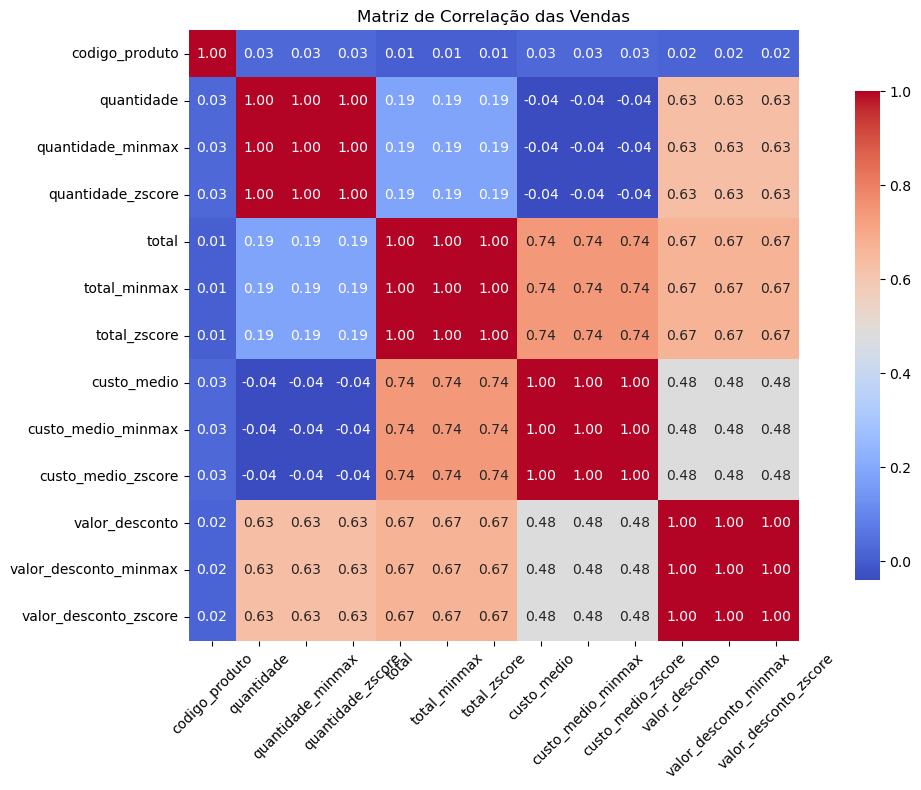

In [206]:
#matriz de correlação
fig10 = plt.figure(figsize=(12, 8))
sns.heatmap(df_vendas_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Vendas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
fig10.show()